![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadística
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [105]:
### 1.-
beers = pd.read_csv('data/datasets_beers.csv')

In [106]:
### 2.-
beers.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [107]:
### 3.-
beers.columns

Index(['Unnamed: 0', 'abv', 'ibu', 'id', 'name', 'style', 'brewery_id',
       'ounces'],
      dtype='object')

In [108]:
print(f"3.- Número de dimensiones: {beers.ndim}")

3.- Número de dimensiones: 2


In [109]:
###Algunas cosas más. Ojo con los null de ibu, abv y style
beers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2410 non-null   int64  
 1   abv         2348 non-null   float64
 2   ibu         1405 non-null   float64
 3   id          2410 non-null   int64  
 4   name        2410 non-null   object 
 5   style       2405 non-null   object 
 6   brewery_id  2410 non-null   int64  
 7   ounces      2410 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.8+ KB


In [110]:
beers.describe(include="all")

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
count,2410.000000,2348.000000,1405.000000,2410.000000,2410,2405,2410.000000,2410.000000
unique,NaN,NaN,NaN,NaN,2305,99,NaN,NaN
top,NaN,NaN,NaN,NaN,Nonstop Hef Hop,American IPA,NaN,NaN
freq,NaN,NaN,NaN,NaN,12,424,NaN,NaN
mean,1204.500000,0.059773,42.713167,1431.113278,NaN,NaN,231.749793,13.592241
std,695.851397,0.013542,25.954066,752.459975,NaN,NaN,157.685604,2.352204
min,0.000000,0.001000,4.000000,1.000000,NaN,NaN,0.000000,8.400000
25%,602.250000,0.050000,21.000000,808.250000,NaN,NaN,93.000000,12.000000
50%,1204.500000,0.056000,35.000000,1453.500000,NaN,NaN,205.000000,12.000000
75%,1806.750000,0.067000,64.000000,2075.750000,NaN,NaN,366.000000,16.000000


## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [111]:
beers.drop(["Unnamed: 0"], axis = 1,inplace=True)
beers.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [112]:
print(f"{beers.shape[0]} filas, {beers.shape[1]} columnas")

2410 filas, 7 columnas


## Ejercicio 5
¿De qué tipo son los datos?

In [113]:
beers.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

## Ejercicio 6
Obtén en un nuevo DataFrame un resumen con las principales estadísticas de las columnas numéricas: mean, max, count, cuartiles...

In [114]:
beers_stats = beers.describe()
beers_stats

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [115]:
beers["style"].value_counts()

style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
Wheat Ale                           1
Grisette                            1
Flanders Oud Bruin                  1
Braggot                             1
Low Alcohol Beer                    1
Name: count, Length: 99, dtype: int64

In [116]:
beers["style"].value_counts(normalize=True).round(4)*100

style
American IPA                      17.63
American Pale Ale (APA)           10.19
American Amber / Red Ale           5.53
American Blonde Ale                4.49
American Double / Imperial IPA     4.37
                                  ...  
Wheat Ale                          0.04
Grisette                           0.04
Flanders Oud Bruin                 0.04
Braggot                            0.04
Low Alcohol Beer                   0.04
Name: proportion, Length: 99, dtype: float64

## Ejercicio 8
1. Imprime por pantalla los registros desde el décimo hasta el vigésimo
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [117]:
#1.-
beers.iloc[10:21]

,abv,ibu,id,name,style,brewery_id,ounces
10,0.072,NaN,2099,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,0.073,NaN,2098,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,0.069,NaN,2097,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,0.085,NaN,1980,Troll Destroyer,Belgian IPA,177,12.0
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
15,0.060,NaN,2318,Ginja Ninja,Cider,154,12.0
16,0.060,NaN,2170,Cherried Away,Cider,154,12.0
17,0.060,NaN,2169,Rhubarbarian,Cider,154,12.0
18,0.060,NaN,1502,BrightCider,Cider,154,12.0
19,0.082,NaN,1593,He Said Baltic-Style Porter,Baltic Porter,368,12.0


In [118]:
#2.-
beers.iloc[10:21].loc[:,"name":"ounces"]

,name,style,brewery_id,ounces
10,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,Troll Destroyer,Belgian IPA,177,12.0
14,Bitter Bitch,American Pale Ale (APA),177,12.0
15,Ginja Ninja,Cider,154,12.0
16,Cherried Away,Cider,154,12.0
17,Rhubarbarian,Cider,154,12.0
18,BrightCider,Cider,154,12.0
19,He Said Baltic-Style Porter,Baltic Porter,368,12.0


In [119]:
#3.-
beers.iloc[10:21][["abv","ibu","ounces"]]

,abv,ibu,ounces
10,0.072,NaN,12.0
11,0.073,NaN,12.0
12,0.069,NaN,12.0
13,0.085,NaN,12.0
14,0.061,60.0,12.0
15,0.060,NaN,12.0
16,0.060,NaN,12.0
17,0.060,NaN,12.0
18,0.060,NaN,12.0
19,0.082,NaN,12.0


In [120]:
#4.-
beers_subset = np.array(beers.iloc[10:21][["abv","ibu","ounces"]])
beers_subset

array([[ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [121]:
print(f"{beers["ounces"].sum()} onzas")

32757.3 onzas


## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [122]:
print("1.- La media de amargor en IBUs de la población es:",beers["ibu"].mean().round(2))
print("2a.- El amargor máximo es:",beers["ibu"].max())
print("2b.- El amargor mínimo es:",beers["ibu"].min())

1.- La media de amargor en IBUs de la población es: 42.71
2a.- El amargor máximo es: 138.0
2b.- El amargor mínimo es: 4.0


In [150]:
###3a.- Cerveza más amarga
beers[beers["ibu"] == beers["ibu"].max()]

,abv,ibu,id,name,style,brewery_id,ounces
147,0.082,138.0,980,Bitter Bitch Imperial IPA,American Double / Imperial IPA,374,12.0


In [124]:
###3b.- Cervezas menos amargas
beers[beers["ibu"] == beers["ibu"].min()]

,abv,ibu,id,name,style,brewery_id,ounces
106,0.056,4.0,1350,Summer Solstice,Cream Ale,171,12.0
112,0.056,4.0,753,Summer Solstice Cerveza Crema (2009),Cream Ale,171,12.0
117,0.056,4.0,77,Summer Solstice (2011),Cream Ale,171,12.0


## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [125]:
###
print("Mediana:",beers["ibu"].median())
print("Desviación Típica:",beers["ibu"].std().round(2))

Mediana: 35.0
Desviación Típica: 25.95


### Razonamiento:
Con una media de 42,71, una mediana de 35 y una desv. típica de 25,95, podemos observar que:
- Una gran parte de cervezas tienen un amargor menor a 42,71, pero unas pocas tienen mucho amargor (media superior a la mediana).
- Una desviación típica menor a la media puede indicarnos una relativa concentración de los datos, si bien esta no es muy alta

## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonamiento mediante un gráfico

<Axes: >

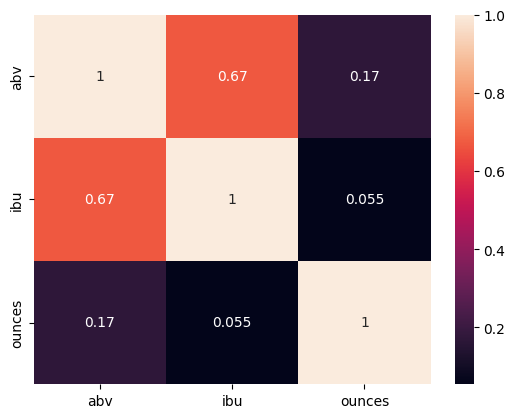

In [126]:
beers_corr = beers[["abv","ibu","ounces"]].corr()
sns.heatmap(beers_corr, annot=True)

### Razonamiento:
Podemos considerar que hay una relación lineal positiva entre el la graduación alcohólica `(abv)` y el amargor `(ibu)`. Sin embargo, esta no es muy significativa. Además, el empaquetado en onzas de la cerveza no parece guardar relación con ninguna de las demás variables.

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

Asimetría de abv: 0.96


<Axes: xlabel='abv', ylabel='Count'>

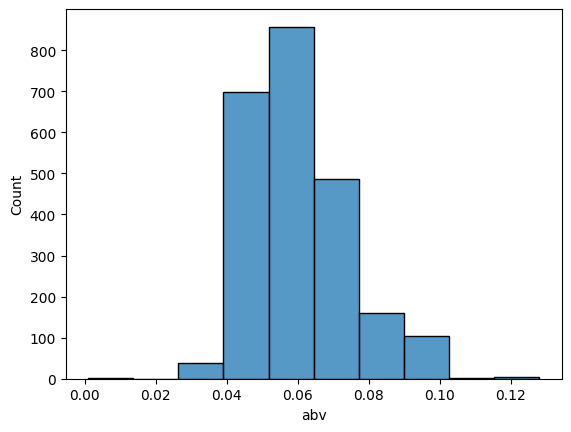

In [127]:
###Stats,skew parece no funcionar con Nans. Dropeamos valores en un nuevo df para poder hacer el análisis
skew_study = beers["abv"].dropna()
skew_study
print("Asimetría de abv:",stats.skew(skew_study).round(2))
sns.histplot(beers["abv"], bins = 10)

### Razonamiento:
El histograma nos muestra una cola de la distribución de `abv` hacia la derecha. Confirmamos esto con el cálculo de la asimetría (0,96), un valor muy cercano a 1. Esto nos confirma que, efectivamente, **hay una asimetría positiva**

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

<Axes: ylabel='abv'>

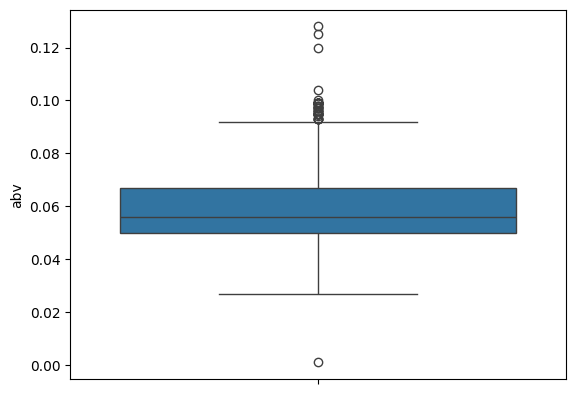

In [128]:
sns.boxplot(beers["abv"])

El 50% de las cervezas tienen, aproximadamente, entre 5 y 7 % de alcohol. Tenemos unos outliers de unas pocas cervezas de muy alta graduación (9%+), y también parece que contamos en el dataset con una cerveza sin alcohol

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [129]:
##1.- Los cinco estilos con más alcohol, de media
beers.groupby("style")["abv"].mean().sort_values(ascending=False).iloc[:5]

style
English Barleywine        0.107667
Quadrupel (Quad)          0.104000
American Barleywine       0.099000
American Malt Liquor      0.099000
Russian Imperial Stout    0.097636
Name: abv, dtype: float64

In [130]:
##1.- Los cinco estilos más amargos, de media
beers.groupby("style")["ibu"].mean().sort_values(ascending=False).iloc[:5]

style
American Barleywine                   96.00
American Double / Imperial IPA        93.32
Russian Imperial Stout                86.50
American Double / Imperial Pilsner    85.00
Belgian Strong Dark Ale               72.00
Name: ibu, dtype: float64

## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

In [131]:
brews = pd.read_csv('data/datasets_breweries.csv')
brews

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra también la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [136]:
brews.rename(columns={"Unnamed: 0":"brewery_id",
              "name": "brewery_name"},
              inplace=True)
brews


,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


## Ejercicio 18
Junta los dos datasets que tienes

In [138]:
beers_complete = pd.merge(beers,brews)
beers_complete

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas cervecerías hay?

In [144]:
print("1.-",brews["state"].nunique(),"estados")
print("2.-",brews["city"].nunique(),"ciudades")
print("3.-",brews["brewery_id"].nunique(),"cervecerías")

1.- 51 estados
2.- 384 ciudades
3.- 558 cervecerías


## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [147]:
beers_complete.groupby(["state","city"])["abv"].aggregate(["mean","median","max"])

mean  median    max
state city                               
AK    Anchorage   0.054200  0.0520  0.063
      Juneau      0.053000  0.0530  0.053
      Soldotna    0.058500  0.0580  0.068
      Talkeetna   0.059500  0.0585  0.065
AL    Birmingham  0.065400  0.0600  0.093
...                    ...     ...    ...
WI    Wilson      0.055000  0.0550  0.055
WV    Lewisburg   0.062000  0.0620  0.067
WY    Jackson     0.054857  0.0520  0.068
      Pinedale    0.061000  0.0610  0.072
      Sheridan    0.052833  0.0480  0.070

[401 rows x 3 columns]

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

In [175]:
###State parece tener siempre un espacio al principio.
beers_complete["state"] = beers_complete["state"].str.replace(" ","")
beers_complete[beers_complete["state"]=="IN"].sort_values("ibu", ascending=False)[["name","ibu","state"]][:5]

,name,ibu,state
479,Hopkick Dropkick,115.0,IN
2191,Overlord Imperial IPA,115.0,IN
811,Half Cycle IPA,104.0,IN
2062,Isis,91.0,IN
2189,Csar,90.0,IN


## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

In [176]:
beers_complete.groupby("city")["ibu"].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Abingdon,1.0,135.000000,NaN,135.0,135.00,135.0,135.00,135.0
Abita Springs,3.0,27.333333,21.455380,13.0,15.00,17.0,34.50,52.0
Ada,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afton,4.0,43.000000,19.899749,22.0,28.00,45.0,60.00,60.0
Airway Heights,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
Woodinville,4.0,46.750000,18.643587,27.0,39.75,44.0,51.00,72.0
Worcester,1.0,69.000000,NaN,69.0,69.00,69.0,69.00,69.0
Yakima,2.0,54.000000,22.627417,38.0,46.00,54.0,62.00,70.0


## Ejercicio 23
Consigue en un DataFrame de todas las cervezas en cuyas cervecerías al menos haya una cerveza con un `abv` mínimo 0.07.

In [181]:
brews_filter = beers_complete[beers_complete["abv"] >= .07]["brewery_id"].unique()
beers_complete[beers_complete["brewery_id"].isin(brews_filter)]

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [238]:
avg_ibu_state = beers_complete.groupby("state")["ibu"].mean() ###Sacamos la media de amargor de los estados
states_filter = (avg_ibu_state > beers_complete["ibu"].mean()) ### La comparamos con la media de cervezas
states_filter = states_filter[states_filter==True].reset_index()["state"] ### Y filtramos por True. Se nos había convertido en una serie con los estados como índices, con lo que los sacamos con el reset_index 
beers_complete[beers_complete["state"].isin(states_filter)]


,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2404,0.075,NaN,1035,Rocky Mountain Oyster Stout,American Stout,424,12.0,Wynkoop Brewing Company,Denver,CO
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
